# Miguel Angel Ruiz Ortiz
## Procesamiento de Lenguaje Natural
## Tarea 1: Librería NLTK

### Esta tarea SÍ agrega las conferencias mañaneras de la presidenta Sheinbaum.

Liga a conferencias matutinas de AMLO y Sheinbaum: [link de Google Drive](https://drive.google.com/drive/folders/1-9NH3M9vvze0rpR67_ZvoWYqWQcyQDA2?usp=sharing)

In [4]:
from pathlib import Path
import nltk
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 1- Cargar corpus

In [6]:
amlo_conferences_path = Path("/content/drive/My Drive/Academic Stuff/NLP (CIMAT)/corpus/conferencias-presidencia-mx/conferencias-amlo")
sheinbaum_conferences_path = Path("/content/drive/My Drive/Academic Stuff/NLP (CIMAT)/corpus/conferencias-presidencia-mx/conferencias-sheinbaum")

Vamos a cargar el corpus de las conferencias en un diccionario { fecha : conferencia } para acceder a la conferencia de una fecha dada.

In [28]:
def get_file_paths(dir_path: Path) -> list[str]:
    """
      Get file paths from a given directory
    """
    return list(dir_path.glob("*.txt"))

In [29]:
def get_corpus(file_paths: list[Path]) -> dict[str, str]:
    """
    Get corpus from a list of file paths, with .txt files, as a dictionary { file name -> file content }
    """
    corpus = {}

    for file in file_paths:
      with open(file, "r", encoding="utf-8") as f:
        filename, _ = file.name.split(".") # we quit extension .txt from file name
        corpus[filename] = f.read()

    return corpus

In [30]:
amlo_filenames = get_file_paths(amlo_conferences_path)
shein_filenames = get_file_paths(sheinbaum_conferences_path)

In [31]:
print(f"AMLO: {len(amlo_filenames)} conferencias")
print(f"Sheinbaum: {len(shein_filenames)} conferencias")

AMLO: 1370 conferencias
Sheinbaum: 79 conferencias


Sólo consideramos las últimas 500 conferenciasm de AMLO, porque con el dataset completo se crashea la sesión por utilizar toda la RAM.

In [32]:
amlo_filenames.sort(key = lambda path: path.name)
amlo_filenames = amlo_filenames[-500:]

Cargamos las conferencias

In [33]:
amlo_corpus = get_corpus(amlo_filenames)
shein_corpus = get_corpus(shein_filenames)

In [34]:
list(amlo_corpus.keys())[:5]

['2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11']

Fechas ordenadas:

In [36]:
conferences_dates = list(amlo_corpus.keys())
conferences_dates_shein = list(shein_corpus.keys())
conferences_dates.sort()
conferences_dates_shein.sort()

## 2- Vistazo a los datos

### 2.1- Cargue todas las conferencias en un string y aplique la función split para generar tokens fácilmente.

La siguiente función toma el corpus como diccionario y la lista de fechas de las conferencias ordenadas de manera cronológica, para poder cargar en una única string (con el método ``.join()``) las conferencias en el orden dado por la lista.

In [37]:
def get_corpus_as_string(corpus: dict[str, str], key_order: list[str]) -> str:
  """
  It transforms corpus given as a dictionary { key -> value } into a single string, concatenating the values in the order specified by the list of keys key_order.
  """
  return "".join([corpus[key] for key in key_order])

Conferencias en una string, e imprimimos los primeros 500 caracteres.

In [38]:
amlo_corpus_str = get_corpus_as_string(amlo_corpus, conferences_dates)
shein_corpus_str = get_corpus_as_string(shein_corpus, conferences_dates_shein)

AMLO:

In [39]:
print(amlo_corpus_str[:500])

05.07.22 Versión estenográfica de la conferencia de prensa matutina del presidente Andrés Manuel López Obrador

2022: Año de Ricardo Flores Magón, precursor de la Revolución Mexicana
 

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos días. Ánimo.
Bueno, vamos a informar, como todos los martes, sobre la situación de salud.
También quedamos en informar sobre el agua en Nuevo León. Va a intervenir el ingeniero Germán Martínez Santoyo, director de Conagua, porque un compañero de ustedes nos pidió inf


Sheinbaum:

In [40]:
print(shein_corpus_str[:500])

Versión estenográfica. Conferencia de prensa de la presidenta Claudia Sheinbaum Pardo, del 2 de octubre de 2024
 
PRESIDENTA CLAUDIA SHEINBAUM PARDO: Buenos días. ¿Cómo están? Casa llena. Muy buenos días a todos, a todas.
El día de hoy, primera mañanera del pueblo en el Segundo Piso de la Cuarta Transformación, lo vamos a dedicar al 2 de octubre, 2 de octubre no se olvida. Hace 56 años, en la plaza de Tlatelolco, después de un movimiento estudiantil que lo que pedía era libertad, democracia, lib


Obtenemos tokens con el método ``.split()``.

In [41]:
amlo_tokens = amlo_corpus_str.split()
shein_tokens = shein_corpus_str.split()

Primeros 10 tokens de conferencias de AMLO:

In [42]:
amlo_tokens[:10]

['05.07.22',
 'Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'de',
 'prensa',
 'matutina',
 'del']

Primeros 10 tokens de conferencias de Sheinbaum:

In [43]:
shein_tokens[:10]

['Versión',
 'estenográfica.',
 'Conferencia',
 'de',
 'prensa',
 'de',
 'la',
 'presidenta',
 'Claudia',
 'Sheinbaum']

### 2.2- Contar la cantidad de palabras en todas las conferencias.

AMLO:

In [44]:
N_amlo = len(amlo_tokens)
print("Cantidad de palabras en todas las conferencias de AMLO:", N_amlo)

Cantidad de palabras en todas las conferencias de AMLO: 6615760


Sheinbaum:

In [45]:
N_shein = len(shein_tokens)
print("Cantidad de palabras en todas las conferencias de Sheinbaum:", N_shein)

Cantidad de palabras en todas las conferencias de Sheinbaum: 984761


### 2.3- Extraer el vocabulario y mostrar su longitud de todo el corpus

El vocabulario lo extraemos a partir de un set de Python

In [46]:
vocab_amlo = set(amlo_tokens)
vocab_shein = set(shein_tokens)
N_vocab_amlo = len(vocab_amlo)
N_vocab_shein = len(vocab_shein)

In [47]:
print("Longitud del vocabulario de AMLO:", N_vocab_amlo)
print("Longitud del vocabulario de Sheinbaum:", N_vocab_shein)

Longitud del vocabulario de AMLO: 171634
Longitud del vocabulario de Sheinbaum: 60867


### 2.4- Mida la riqueza del vocabulario de alguna forma en todos los documentos

Usaremos la diversidad léxica, que es el porcentaje de palabras únicas con respecto a todas las palabras. De tal manera que el inverso de la diversidad léxica nos dice en promedio cuántas veces se usa cada palabra.

In [48]:
def lexical_diversity(text: list[str]) -> float:
  """
  Returns the lexical diversity in a given text, that is the number of distinct words divided by the total number of words.
  """
  return len(set(text)) / len(text)

Diversidad léxica - AMLO:

In [49]:
richness_amlo = lexical_diversity(amlo_tokens)
print(f"Diversidad léxica: {richness_amlo:.6f} - Cada palabra se usa en promedio {1/richness_amlo:.2f} veces")

Diversidad léxica: 0.025943 - Cada palabra se usa en promedio 38.55 veces


Diversidad léxica - Sheinbaum:

In [50]:
richness_shein = lexical_diversity(shein_tokens)
print(f"Diversidad léxica: {richness_shein:.6f} - Cada palabra se usa en promedio {1/richness_shein:.2f} veces")

Diversidad léxica: 0.061809 - Cada palabra se usa en promedio 16.18 veces


### 2.5- Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. Vea las diferencias y comente brevemente.

La cantidad de palabras no cambia, pues sólo cambiamos a minúsculas.

Textos en minúsculas:

In [51]:
amlo_corpus_str_lower = amlo_corpus_str.lower()
shein_corpus_str_lower = shein_corpus_str.lower()

print(amlo_corpus_str_lower[:500])
print(" -----------------------------------------------------------------  ")
print(shein_corpus_str_lower[:500])

05.07.22 versión estenográfica de la conferencia de prensa matutina del presidente andrés manuel lópez obrador

2022: año de ricardo flores magón, precursor de la revolución mexicana
 

presidente andrés manuel lópez obrador: buenos días. ánimo.
bueno, vamos a informar, como todos los martes, sobre la situación de salud.
también quedamos en informar sobre el agua en nuevo león. va a intervenir el ingeniero germán martínez santoyo, director de conagua, porque un compañero de ustedes nos pidió inf
 -----------------------------------------------------------------  
versión estenográfica. conferencia de prensa de la presidenta claudia sheinbaum pardo, del 2 de octubre de 2024
 
presidenta claudia sheinbaum pardo: buenos días. ¿cómo están? casa llena. muy buenos días a todos, a todas.
el día de hoy, primera mañanera del pueblo en el segundo piso de la cuarta transformación, lo vamos a dedicar al 2 de octubre, 2 de octubre no se olvida. hace 56 años, en la plaza de tlatelolco, después de un

Extracción de tokens con split

In [52]:
amlo_tokens_lower = amlo_corpus_str_lower.split()
shein_tokens_lower = shein_corpus_str_lower.split()

Extracción de vocabulario

In [53]:
vocab_amlo_lower = set(amlo_tokens_lower)
N_vocab_amlo_lower = len(vocab_amlo_lower)
vocab_shein_lower = set(shein_tokens_lower)
N_vocab_shein_lower = len(vocab_shein_lower)

In [54]:
print(
    "AMLO -> Longitud del vocabulario con minúsculas:",
    N_vocab_amlo_lower,
    " - vs vocabulario en mayúsculas:",
    N_vocab_amlo,
    f" - Reducción del {100-N_vocab_amlo_lower/N_vocab_amlo*100:.2f}%"
  )
print(
    "Sheinbaum -> Longitud del vocabulario con minúsculas:",
    N_vocab_shein_lower,
    " - vs vocabulario en mayúsculas:",
    N_vocab_shein,
    f" - Reducción del {100-N_vocab_shein_lower/N_vocab_shein*100:.2f}%"
  )

AMLO -> Longitud del vocabulario con minúsculas: 158298  - vs vocabulario en mayúsculas: 171634  - Reducción del 7.77%
Sheinbaum -> Longitud del vocabulario con minúsculas: 55668  - vs vocabulario en mayúsculas: 60867  - Reducción del 8.54%


Aquí vemos que al transformar los textos a minúsculas, el vocabulario se hace más corto. Esto tiene sentido, pues si consideramos el set de las palabras sin hacerlas en minúsculas, palabras como "Hola" y "hola" van a ser distintas en el set.

Medición de riqueza

AMLO:

In [55]:
richness_amlo_lwr = lexical_diversity(amlo_tokens_lower)
print(f"Diversidad léxica con minúsculas: {richness_amlo_lwr:.6f} - Cada palabra se usa en promedio {1/richness_amlo_lwr:.2f} veces")
print(f"Diversidad léxica con mayúsculas: {richness_amlo:.6f} - Cada palabra se usa en promedio {1/richness_amlo:.2f} veces")

Diversidad léxica con minúsculas: 0.023927 - Cada palabra se usa en promedio 41.79 veces
Diversidad léxica con mayúsculas: 0.025943 - Cada palabra se usa en promedio 38.55 veces


Sheinbaum:

In [56]:
richness_shein_lwr = lexical_diversity(shein_tokens_lower)
print(f"Diversidad léxica con minúsculas: {richness_shein_lwr:.6f} - Cada palabra se usa en promedio {1/richness_shein_lwr:.2f} veces")
print(f"Diversidad léxica con mayúsculas: {richness_shein:.6f} - Cada palabra se usa en promedio {1/richness_shein:.2f} veces")

Diversidad léxica con minúsculas: 0.056529 - Cada palabra se usa en promedio 17.69 veces
Diversidad léxica con mayúsculas: 0.061809 - Cada palabra se usa en promedio 16.18 veces


Dado que la reducción del vocabulario al convertir en minúsculas es menor (menos del 10%), es de esperarse que la riqueza del vocabulario no cambie mucho.

### 2.6- Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador *RegExp* de NLTK, con una expresión regular que trate de sacar solo tokens que pueden contener solo letras mayúsculas y minúsculas. Después cargue los tokens en un objeto *Text* de NLTK en lugar de una lista de Python.

La expresión regular "[a-zA-ZáéíóúüÁÉÍÓÚÜ]+" permite obtener cualquier palabra que contenga letras minúsculas, mayúsculas, con acentos y sin acentos, y la vocal U con diéresis (palabras con al menos longitud 1).

In [57]:
amlo_tokens_regex = nltk.regexp_tokenize(amlo_corpus_str, pattern="[a-zA-ZáéíóúüÁÉÍÓÚÜ]+")
shein_tokens_regex = nltk.regexp_tokenize(shein_corpus_str, pattern="[a-zA-ZáéíóúüÁÉÍÓÚÜ]+")

In [58]:
N_amlo_regex = len(amlo_tokens_regex)
N_shein_regex = len(shein_tokens_regex)
print("Cantidad de tokens en todas las conferencias de AMLO:", N_amlo_regex)
print("Cantidad de tokens en todas las conferencias de Sheinbaum:", N_shein_regex)

Cantidad de tokens en todas las conferencias de AMLO: 6570723
Cantidad de tokens en todas las conferencias de Sheinbaum: 979669


Algunos tokens:

In [59]:
amlo_tokens_regex[:10]

['Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'de',
 'prensa',
 'matutina',
 'del',
 'presidente']

In [60]:
shein_tokens_regex[100:110]

['segunda',
 'mitad',
 'del',
 'siglo',
 'XX',
 'fue',
 'ordenado',
 'por',
 'el',
 'entonces']

Extracción de vocabulario

In [61]:
vocab_amlo_regex = set(amlo_tokens_regex)
N_vocab_amlo_regex = len(vocab_amlo_regex)
vocab_shein_regex = set(shein_tokens_regex)
N_vocab_shein_regex = len(vocab_shein_regex)
print("Longitud del vocabulario en conferencias de AMLO:", N_vocab_amlo_regex)
print("Longitud del vocabulario en conferencias de Sheinbaum:", N_vocab_shein_regex)

Longitud del vocabulario en conferencias de AMLO: 75332
Longitud del vocabulario en conferencias de Sheinbaum: 30721


Cargar tokens a objeto ``nltk.Text``

In [62]:
amlo_text_regex = nltk.Text(amlo_tokens_regex)
shein_text_regex = nltk.Text(shein_tokens_regex)

In [63]:
print(amlo_text_regex)

<Text: Versión estenográfica de la conferencia de prensa matutina...>


In [64]:
print(shein_text_regex)

<Text: Versión estenográfica Conferencia de prensa de la presidenta...>


### 2.7- Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 usando el tokenizador *TweetTokenizer* ; COMENTE BREVEMENTE DIFERENCIAS. Haga el resto de esta tarea asumiendo haber hecho este punto.

In [65]:
from nltk.tokenize import TweetTokenizer

In [66]:
tweet_tokenizer = TweetTokenizer()
amlo_tokens_twitter = tweet_tokenizer.tokenize(amlo_corpus_str_lower)
shein_tokens_twitter = tweet_tokenizer.tokenize(shein_corpus_str_lower)

In [67]:
N_amlo_twitter = len(amlo_tokens_twitter)
N_shein_twitter = len(shein_tokens_twitter)
print("Cantidad de tokens en las conferencias de AMLO:", N_amlo_twitter)
print("Cantidad de tokens en las conferencias de Sheinbaum:", N_shein_twitter)

Cantidad de tokens en las conferencias de AMLO: 7775665
Cantidad de tokens en las conferencias de Sheinbaum: 1160565


In [68]:
vocab_amlo_twitter = set(amlo_tokens_twitter)
N_vocab_amlo_twitter = len(vocab_amlo_twitter)
vocab_shein_twitter = set(shein_tokens_twitter)
N_vocab_shein_twitter = len(vocab_shein_twitter)

print("Longitud del vocabulario en conferencias de AMLO:", N_vocab_amlo_twitter)
print("Longitud del vocabulario en conferencias de Sheinbaum:", N_vocab_shein_twitter)

Longitud del vocabulario en conferencias de AMLO: 70761
Longitud del vocabulario en conferencias de Sheinbaum: 28395


In [69]:
amlo_text_twitter = nltk.Text(amlo_tokens_twitter)
shein_text_twitter = nltk.Text(shein_tokens_twitter)

In [70]:
print(amlo_text_twitter)
print("-------------------------------------------------------------------")
print(shein_text_twitter)

<Text: 05.07 . 22 versión estenográfica de la conferencia...>
-------------------------------------------------------------------
<Text: versión estenográfica . conferencia de prensa de la...>


Se observa que hay más cantidad de tokens totales en el texto y en el vocabulario usando el tokenizador *TweetTokenizer*, pues se toman en cuenta números, signos de puntuación, URL's, entre otros tokens. Más adelante se observabará que en efecto el dataset cuenta con estos tokens extras en comparación del tokenizador basado en *RegExp* que toma en cuenta secuencias de puras letras.

## 3- Funciones NLTK

### 3.1- Use la función concordance para ver el contexto de 5 palabras que usted elija.

AMLO:

In [71]:
for word in ["calderón", "becas", ["xóchitl", "gálvez"], ["mafia", "del", "poder"], "cuba"]:
  print("\nContexto de:", word)
  amlo_text_twitter.concordance(word, width=150, lines=3)


Contexto de: calderón
Displaying 3 of 2011 matches:
ya sea de una vez solucionada esta situación ? y pues dicen : ‘ felipe calderón nos quitó la oportunidad de seguir trabajando para dar estas concesion
ola . y si ya queremos llevarlo al detalle , pues recordar que ofreció calderón hacer una refinería ; hicieron toda una alharaca y terminaron cancelan
 gustó mucho ese planteamiento . pregunta : en el 2007 lo hicieron con calderón también . la paz ( inaudible ) presidente andrés manuel lópez obrador 

Contexto de: becas
Displaying 3 of 601 matches:
os apoyos 343 mil 859 personas . los programas son los que vemos aquí : becas ‘ benito juárez ’ , producción para el bienestar , pensión para adultos
ndo a 152 jóvenes que trabajan como aprendices . se están entregando 69 becas a estudiantes de nivel superior , los que están estudiando licenciatura
 niños de madres solteras que están en estancias infantiles también con becas . en el caso de estos apoyos incluyen también a campesinos , 292 ca

Sheinbaum:

In [72]:
for word in ["becas", "investigación", "conahcyt", "covid", ["inteligencia", "artificial"]]:
  print("\nContexto de:", word)
  shein_text_twitter.concordance(word, width=150, lines=3)


Contexto de: becas
Displaying 3 of 46 matches:
eso para los derechos de las mujeres ; el viernes vamos a hablar de las becas , y así vamos a seguir con información y preguntas . pero , además , va
stán ? muy buenos días . el día de hoy vamos a presentar el programa de becas para niños y niñas . están aquí — siéntense — mario delgado y julio leó
quí — siéntense — mario delgado y julio león , que es el coordinador de becas para el bienestar , y mario delgado , secretario de educación . entonce

Contexto de: investigación
Displaying 3 of 503 matches:
iolencia . voz mujer : el periódico inglés the guardian realizó una investigación y publicó que 325 personas fueron asesinadas ese día . voz hombre :
ue vamos a enviar , sobre todo para fortalecer la inteligencia y la investigación . nuestra estrategia consiste en cuatro ejes : es atención a las ca
a y la secretaría de seguridad ciudadana en la inteligencia , en la investigación , y que nos permita llevar a la judicialización de casos en la 

### 3.2- Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre también los contextos comunes. COMENTE al respecto.

AMLO:

In [73]:
amlo_text_twitter.similar("gobierno")

país que estado pueblo presidente trabajo año y tiempo tema caso agua
dinero presupuesto día momento bienestar poder tren programa


In [74]:
amlo_text_twitter.common_contexts(["gobierno", "presidente"])

el_de del_de el_del al_de del_del de_y el_y de_de el_no el_que del_y
al_y al_del su_y el_anterior el_estaba el_en de_en un_que el_se


Sheinbaum:

In [75]:
shein_text_twitter.similar("investigación")

salud información seguridad atención violencia ley vivienda que
economía familia méxico campaña reforma coordinación corrupción
presidenta estrategia comunicación inversión reunión


In [76]:
shein_text_twitter.common_contexts(["información", "investigación"])

la_que la_de la_y la_pregunta de_y la_en de_de esta_que la_del una_que
esta_y alguna_sobre la_para de_que esta_de la_el la_completa la_es
la_no de_en


Estos ejemplos muestran que el método ``.similar()`` sí nos da palabras que suelen ser usados en contextos similares, como lo es "gobierno" y "presidente", y tambié "información" e "investigación".

### 3.3- Haciendo uso de alguna librería time de Python: organice todos los archivos de las conferencias desde la más antigua hasta la más nueva (echando mano del nombre del archivo y fechas), y cárguelos en un objeto Text para generar un dispersion plot de las siguientes palabras: prian, corrupción, mafia, narco, gasolina, pipas, conacyt, conahcyt, ciencia, turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunación y otras cinco palabras de su elección.

Al cargar nuestro corpus ya tomábamos en cuenta el orden de las fechas usando el orden lexicográfico de las strings "YYYY-MM-DD". Pero se hace con la librería *datetime* de la siguiente manera:

``
conferences_dates.sort(key=lambda date: datetime.datetime.strptime(date, "%Y-%m-%d"))
``

AMLO



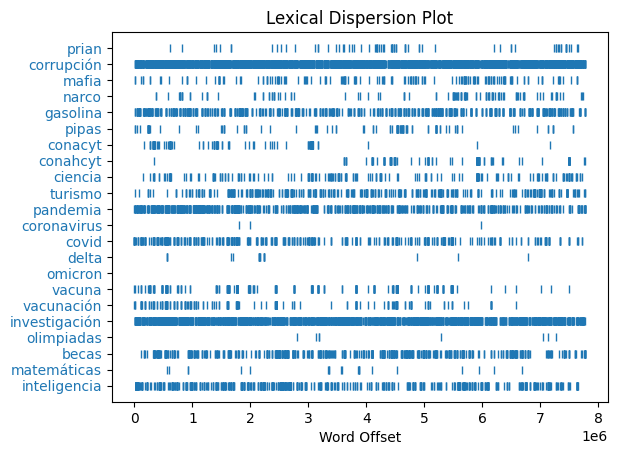

In [77]:
amlo_text_twitter.dispersion_plot(
    [
        "prian",
        "corrupción",
        "mafia",
        "narco",
        "gasolina",
        "pipas",
        "conacyt",
        "conahcyt",
        "ciencia",
        "turismo",
        "pandemia",
        "coronavirus",
        "covid",
        "delta",
        "omicron",
        "vacuna",
        "vacunación",
        "investigación",
        "olimpiadas",
        "becas",
        "matemáticas",
        "inteligencia"
    ]
)

Sheinbaum

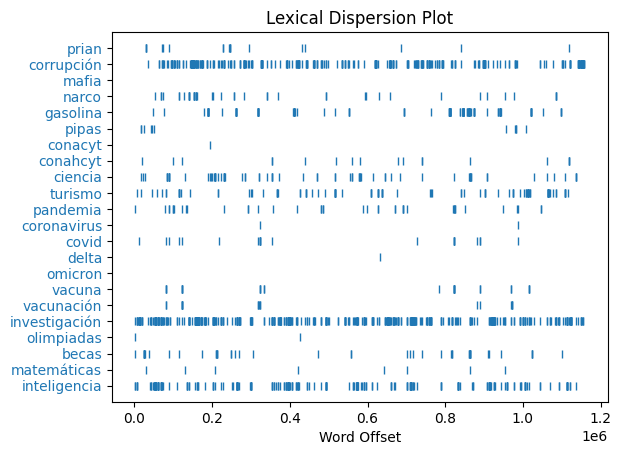

In [78]:
shein_text_twitter.dispersion_plot(
    [
        "prian",
        "corrupción",
        "mafia",
        "narco",
        "gasolina",
        "pipas",
        "conacyt",
        "conahcyt",
        "ciencia",
        "turismo",
        "pandemia",
        "coronavirus",
        "covid",
        "delta",
        "omicron",
        "vacuna",
        "vacunación",
        "investigación",
        "olimpiadas",
        "becas",
        "matemáticas",
        "inteligencia"
    ]
)

### 3.4- Muestre 50 colocaciones de todo el corpus.

In [79]:
nltk.download('stopwords') # necessary for collocations method

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

AMLO

In [80]:
amlo_text_twitter.collocations(num=50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; por ciento; buenos días; nada más; señor presidente; ramírez
cuevas; jesús ramírez; tren maya; todos los; guardia nacional; poder
judicial; por eso; por ejemplo; quintana roo; sin embargo; garcía
luna; creo que; muchas gracias; baja california; por qué; sobre todo;
muy bien; desde luego; mil millones; derechos humanos; todas las; rosa
icela; muy importante; que que; los medios; nuestro país; pesos con;
redes sociales; los jóvenes; para que; ver con; estamos hablando; del
estado; del pueblo; fuerzas armadas; tiene que; muy buenos; comisión
federal; seguridad pública; suprema corte; finaliza video


Sheinbaum

In [81]:
shein_text_twitter.collocations(num=50)

claudia sheinbaum; sheinbaum pardo; estados unidos; buenos días; por
ciento; lópez obrador; poder judicial; muchas gracias; muy importante;
todos los; por ejemplo; presidenta claudia; nuestro país; presidente
lópez; las mujeres; andrés manuel; baja california; por supuesto;
todas las; sin embargo; nada más; tiene que; tren maya; sobre todo;
para poder; mil millones; por eso; ver con; director general; las
personas; creo que; los mexicanos; manuel lópez; fiscalía general;
guardia nacional; del estado; donald trump; los trabajadores; para
que; otro lado; cuarta transformación; estamos trabajando; por qué;
próximo año; que ver; quiere decir; los estados; presidente trump;
garcía luna; rosa icela


### 3.5- Muestre un histograma de longitud en caracteres de las palabras. Muestre en el histograma el top 5 de longitudes más largas.

In [82]:
from nltk.probability import FreqDist

In [83]:
def histogram_word_len(text: nltk.Text) -> None:
    len_words = [len(word) for word in text]
    len_dist = FreqDist(len_words)

    plt.figure(figsize=(12, 5))
    plt.bar(len_dist.keys(), len_dist.values(), color='blue', alpha=0.7)
    plt.xlabel("Longitud de palabras")
    plt.ylabel("Conteo")
    plt.title("Histograma de longitud de palabras")
    plt.xticks(rotation=90)
    plt.show()

    print("Top 5 de longitudes más largas:")
    len_words_unique = list(len_dist.keys())
    len_words_unique.sort()
    print(len_words_unique[-5:])

    print("Algunos ejemplos:")

    for word in text.vocab():
      if len(word) in len_words_unique[-5:]:
        print(word, len(word))


AMLO

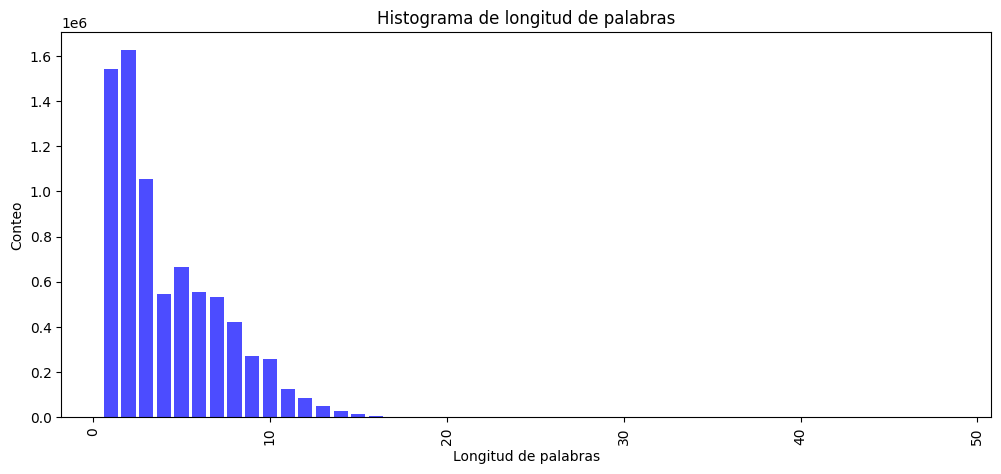

Top 5 de longitudes más largas:
[38, 40, 41, 43, 48]
Algunos ejemplos:
fondodepensionesparaelbienestar.gob.mx 38
méxico-querétaro-irapuato-guadalajara-manzanillo 48
manzanillo-colima-guadalajara-irapuato 38
medicosespecialistas.imssbienestar.gob.mx 41
medicosespecialistasimssbienestar.gob.mx 40
profesionalesdelasalud.imssbienestar.gob.mx 43


In [84]:
histogram_word_len(amlo_text_twitter)

Sheinbaum

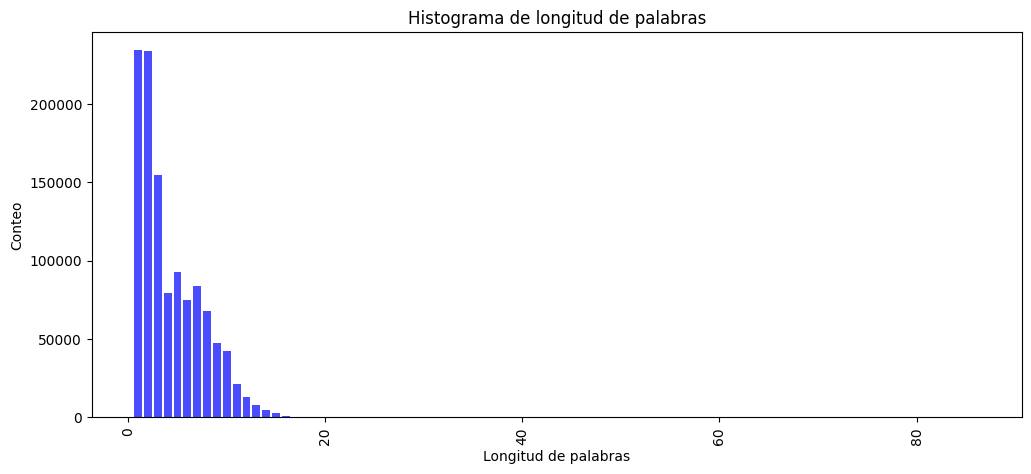

Top 5 de longitudes más largas:
[35, 37, 40, 43, 86]
Algunos ejemplos:
www.registroeleccionjudicial.adyt.gob.mx 40
www.jovenesconstruyendoelfuturo.stps.gob.mx 43
detectordementiras@infodemia.gob.mx 35
reformaindigenatraduccion.inpi.gob.mx 37
atencionproveedores@imssbienestar.gob.mx 40
https://consulmex.sre.gob.mx/index.php/observatorio-de-leyes-y-medidas-antiinmigrantes 86


In [85]:
histogram_word_len(shein_text_twitter)

### 3.6- Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo el texto usando comprenhension list de python.

In [86]:
def exercise_3_6(text: nltk.Text) -> list[str]:
  word_count = FreqDist(text)

  filtered_words = [word for word in word_count if len(word) > 8 and word_count[word] > 5]

  return filtered_words[:50]

AMLO

In [87]:
exercise_3_6(amlo_text_twitter)

['presidente',
 'seguridad',
 'importante',
 'interlocutor',
 'interlocutora',
 'información',
 'intervención',
 'secretaría',
 'corrupción',
 'trabajadores',
 'mexicanos',
 'bienestar',
 'secretario',
 'elementos',
 'construcción',
 'trabajando',
 'investigación',
 'inversión',
 'presupuesto',
 'siguiente',
 'comunicación',
 'aeropuerto',
 'gobernador',
 'preguntarle',
 'transformación',
 'desarrollo',
 'situación',
 'democracia',
 'administración',
 'república',
 'kilómetros',
 'imagínense',
 'violencia',
 'constitución',
 'población',
 'hospitales',
 'inaudible',
 'solamente',
 'autoridades',
 'protección',
 'california',
 'municipios',
 'gobiernos',
 'secretaria',
 'precisamente',
 'educación',
 'electoral',
 'instituto',
 'internacional',
 'diciembre']

Sheinbaum

In [88]:
exercise_3_6(shein_text_twitter)

['presidenta',
 'sheinbaum',
 'importante',
 'presidente',
 'seguridad',
 'secretaría',
 'mexicanos',
 'bienestar',
 'información',
 'secretario',
 'desarrollo',
 'trabajando',
 'preguntarle',
 'trabajadores',
 'estrategia',
 'república',
 'educación',
 'constitución',
 'investigación',
 'inversión',
 'solamente',
 'coordinación',
 'secretaria',
 'violencia',
 'programas',
 'presentar',
 'infonavit',
 'particularmente',
 'constitucional',
 'transformación',
 'presupuesto',
 'instituto',
 'cualquier',
 'proyectos',
 'corrupción',
 'administración',
 'particular',
 'diciembre',
 'servicios',
 'protección',
 'gobernador',
 'producción',
 'justamente',
 'resultados',
 'finalmente',
 'comunicación',
 'situación',
 'población',
 'fentanilo',
 'infraestructura']

### 3.7- Ver https://www.nltk.org/book/ch02.html en la sección 1.5. Proponga una gráfica usando ConditionalFreqDist como la de la Sección 1.5 para estos datos. Usted elige las palabras.

Propones la visualización de el conteo de palabras dadas a lo largo de los meses.

In [100]:
def exercise_3_7(corpus: dict[str, str], list_dates: list[str], words_of_interest: list[str]) -> list[str]:
    corpus_per_date = {
        date: tweet_tokenizer.tokenize(corpus[date].lower())
        for date in list_dates
    }

    cfd = nltk.ConditionalFreqDist(
          (target, date[:7]) # consider only year-month in date
          for date in list_dates
          for w in corpus_per_date[date]
          for target in words_of_interest
          if w == target
          )

    plt.figure(figsize=(12, 5))
    cfd.plot()
    plt.show()

AMLO

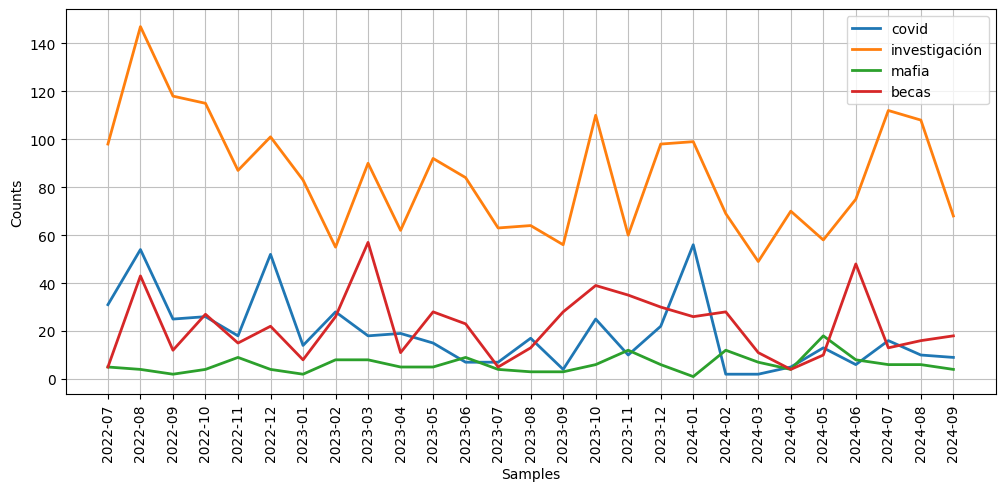

In [101]:
exercise_3_7(amlo_corpus, conferences_dates, ["mafia", "becas", "covid", "investigación"])

Sheinbaum

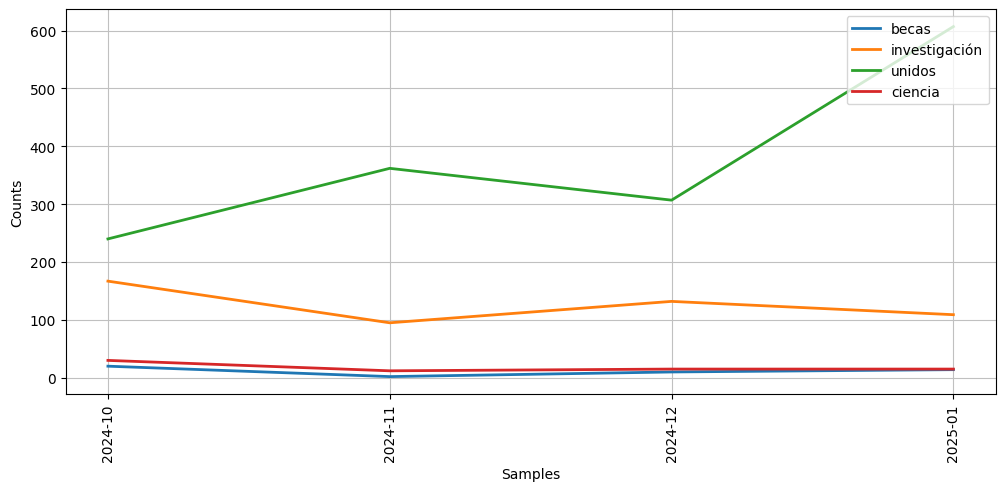

In [105]:
exercise_3_7(shein_corpus, conferences_dates_shein, ["ciencia", "becas", "unidos", "investigación"])

### 3.8- Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y sin stopword. Comente brevemente las diferencias.

In [93]:
from nltk.corpus import stopwords

In [94]:
stopwords_es = set(stopwords.words("spanish"))

AMLO

In [106]:
amlo_no_stopwords = [word for word in amlo_text_twitter if word not in stopwords_es]

print("Número de palabras sin stopwords:", len(amlo_no_stopwords))
print("Número de palabras en total:", N_amlo_twitter)
print(f"Porcentaje: {len(amlo_no_stopwords)/N_amlo_twitter*100:.2f}%")

Número de palabras sin stopwords: 4393340
Número de palabras en total: 7775665
Porcentaje: 56.50%


Sheinbaum

In [108]:
shein_no_stopwords = [word for word in shein_text_twitter if word not in stopwords_es]

print("Número de palabras sin stopwords:", len(shein_no_stopwords))
print("Número de palabras en total:", N_shein_twitter)
print(f"Porcentaje: {len(shein_no_stopwords)/N_shein_twitter*100:.2f}%")

Número de palabras sin stopwords: 662947
Número de palabras en total: 1160565
Porcentaje: 57.12%


Sabemos que las palabras más frecuentes en un texto son stopwords. Según lo que vimos en el video de ley de Zipf en el lenguaje, cerca de la mitad de las palabras son stopwords como bien lo observamos en estos ejemplos.

### 3.9- Muestre las 300 palabras más frecuentes en las conferencias, sin tomar en cuenta stop-words. Muéstrelas de la más frecuente a la menos frecuente.

In [110]:
def exercise_3_9(text: list[str]) -> None:
    words_count = FreqDist(text)

    for word, count in words_count.most_common(300):
      print(f"{word}  ->  {count} veces")

AMLO

In [111]:
exercise_3_9(amlo_no_stopwords)

,  ->  665306 veces
.  ->  264471 veces
:  ->  67017 veces
presidente  ->  45630 veces
¿  ->  35848 veces
?  ->  35768 veces
lópez  ->  24800 veces
manuel  ->  24100 veces
obrador  ->  24088 veces
andrés  ->  23802 veces
;  ->  21859 veces
si  ->  20451 veces
mil  ->  20065 veces
entonces  ->  19775 veces
va  ->  17159 veces
méxico  ->  17067 veces
vamos  ->  16656 veces
‘  ->  16051 veces
’  ->  15482 veces
pues  ->  14008 veces
aquí  ->  13733 veces
ver  ->  11601 veces
bueno  ->  11440 veces
ahí  ->  11189 veces
dos  ->  11147 veces
…  ->  11142 veces
gobierno  ->  10988 veces
ahora  ->  10866 veces
—  ->  10394 veces
millones  ->  9941 veces
pueblo  ->  9685 veces
cómo  ->  9477 veces
pesos  ->  9385 veces
así  ->  8961 veces
caso  ->  8954 veces
ciento  ->  8494 veces
gente  ->  8267 veces
país  ->  7836 veces
nacional  ->  7793 veces
ser  ->  7574 veces
van  ->  7471 veces
señor  ->  7451 veces
poder  ->  7233 veces
usted  ->  7181 veces
años  ->  7162 veces
hacer  ->  7130 veces

Sheinbaum

In [112]:
exercise_3_9(shein_no_stopwords)

,  ->  93135 veces
.  ->  38716 veces
:  ->  11083 veces
presidenta  ->  7050 veces
méxico  ->  6422 veces
¿  ->  5877 veces
?  ->  5850 veces
;  ->  4784 veces
—  ->  4415 veces
entonces  ->  4087 veces
sheinbaum  ->  3859 veces
claudia  ->  3832 veces
pardo  ->  3674 veces
si  ->  3530 veces
pregunta  ->  3297 veces
vamos  ->  3259 veces
va  ->  2922 veces
“  ->  2844 veces
”  ->  2813 veces
…  ->  2461 veces
pues  ->  2085 veces
mil  ->  2055 veces
ver  ->  1846 veces
bueno  ->  1823 veces
parte  ->  1819 veces
gobierno  ->  1738 veces
tema  ->  1735 veces
gracias  ->  1694 veces
nacional  ->  1611 veces
ahora  ->  1574 veces
país  ->  1569 veces
unidos  ->  1516 veces
importante  ->  1499 veces
poder  ->  1495 veces
ahí  ->  1491 veces
aquí  ->  1465 veces
caso  ->  1457 veces
días  ->  1436 veces
cómo  ->  1414 veces
hoy  ->  1412 veces
ser  ->  1372 veces
hacer  ->  1359 veces
presidente  ->  1336 veces
todas  ->  1307 veces
seguridad  ->  1241 veces
van  ->  1210 veces
personas 

## 4- Otras librerías en Python

### 4.1- Mencione dos librerías en Python además de NLTK para NLP. Ponga una desventaja y ventaja de cada una.

**TextBlob**

*   *Ventaja*: Es una capa de abstracción de NLTK, por lo que provee una interfaz más simple para tareas comunes de NLP, e.g, análisis de sentimiento, en pocas líneas de código.
*   *Desventaja*: Para funciones avanzadas es mejor ir directamente a NLTK, pues como TextBlob es un wrapper de NLTK puede ser más complicado implementarlas.


**spaCy**

*   *Ventaja*: Es muy rápido y eficiente, excelente para procesamiento de texto a gran escala, ya que tiene mucha optimización de memoria detrás usando Cython (librería de Python para correr código en C/C++). Ideal para contextos industriales.
*   *Desventaja*: Tiene una curva de aprendizaje muy pronunciada, por lo que no es ideal para principiantes en NLP.

### 4.2- Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes. De una ventaja y desventaja de cada una.

**Quanteda (R)**

*   *Ventaja*: Ofrece una interfaz amigable y simple, ideal para principiantes en NLP. Además es considerado más rápido que otras librerías para NLP en R y en Python por su implementación C++ y manejo de hilos.
*   *Desventaja*: La adopción de R va en declive. Difícilmente se puede poner en producción código de R.


**Apache OpenNLP (Java)**

*   *Ventaja*: Es el toolkit de NLP más común en Java. Ofrece las tareas más usuales de NLP como tokenización, segmentación, etc, y además están disponibles desde línea de comandos para experimentos rápidos.

**NLP.js (NodeJS, JavaScript)**

*   *Ventaja*: NodeJS es el framework para crear backend de aplicaciones, en JavaScript, más usado en el mundo (Statista, 2024). Esta librería permite incluir tareas de NLP a los backend ya existentes.